In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# students data

import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(42)

n = 1000  # number of rows

# ---------------- CLASS DISTRIBUTION ----------------
classes = np.random.choice(
    np.concatenate([np.arange(1, 6), np.repeat(np.arange(6, 11), 3), np.arange(11, 13)]),
    size=n
)

# ---------------- BOARD DISTRIBUTION ----------------
boards = np.random.choice(
    ['State', 'CBSE', 'ICSE', 'International'],
    size=n,
    p=[0.3, 0.4, 0.2, 0.1]
)

# ---------------- MODE & LOCATION ----------------
modes, locations = [], []
for _ in range(n):
    if np.random.rand() < 0.7:  # majority offline in Pune
        modes.append('Offline')
        locations.append(np.random.choice(['Magarpatta', 'Kothrud', 'Hadapsar']))
    else:
        if np.random.rand() < 0.5:
            modes.append('Offline')
            locations.append(np.random.choice(['Mumbai', 'Dubai']))
        else:
            modes.append('Online')
            locations.append('Online')

# ---------------- SALARY GENERATOR ----------------
def sample_salary(size, low, high):
    # Generate multiples of ₹500
    options = np.arange(low // 500, high // 500 + 1) * 500
    return np.random.choice(options, size=size)

seg1 = sample_salary(int(n * 0.6), 3000, 6000)
seg2 = sample_salary(int(n * 0.25), 6000, 10000)
seg3 = sample_salary(int(n * 0.15), 10000, 15000)
salaries = np.concatenate([seg1, seg2, seg3])[:n]

# ---------------- SUBJECTS LOGIC ----------------
subjects_list = []
all_subjects_lower = ['Maths', 'Science', 'English', 'Social Studies', 'Hindi', 'Computer']

for cls in classes:
    if cls <= 10:
        rand_val = np.random.rand()
        if rand_val < 0.1:  # 10% get all subjects
            subjects_list.append("All Subjects")
        elif rand_val < 0.65:  # 55% get Maths & Science (majority)
            subjects_list.append("Maths, Science")
        else:  # 35% get various combinations
            extra = np.random.choice(['English', 'Social Studies', 'Hindi', 'Computer'])
            subject_core = np.random.choice(['Maths', 'Science'])
            subjects_list.append(f"{subject_core}, {extra}")
    else:
        # Classes 11-12: Science or Commerce
        if np.random.rand() < 0.65:  # Science stream dominant
            combos = [
                "Physics, Chemistry, Biology",
                "Physics, Chemistry, Maths",
                "Physics, Chemistry, Biology, Maths"
            ]
            subjects_list.append(np.random.choice(combos))
        else:  # Commerce stream
            combos = [
                "Economics, Accountancy",
                "Economics, Accountancy, Business Studies"
            ]
            subjects_list.append(np.random.choice(combos))

# ---------------- BUILD DATAFRAME ----------------
df = pd.DataFrame({
    'class': classes,
    'board': boards,
    'subjects': subjects_list,
    'mode': modes,
    'location': locations,
    'salary': salaries
})

# Save CSV
df.to_csv('synthetic_student.csv', index=False)
print(f"Generated {n} rows → saved as 'synthetic_student.csv'")

df.head(2)



Generated 1000 rows → saved as 'synthetic_student.csv'


,class,board,subjects,mode,location,salary
0,6,CBSE,"Maths, Science",Offline,Magarpatta,5500
1,10,State,"Science, Social Studies",Offline,Magarpatta,4500


In [3]:
#teacher data

import pandas as pd
import numpy as np

np.random.seed(111)  # reproducibility

n = 3000 # number of teachers to generate

# ---------------- 1. Define possible grade ranges ----------------
possible_ranges = [
    (1, 5), (6, 10), (1, 8), (9, 12),
    (6, 12), (11, 12), (5, 7)
]
probs = [0.1, 0.25, 0.1, 0.1, 0.25, 0.1, 0.1]

grade_ranges = []
for _ in range(n):
    idx = np.random.choice(len(possible_ranges), p=probs)
    base_range = possible_ranges[idx]
    low_grade = np.random.randint(base_range[0], base_range[1] + 1)
    high_grade = np.random.randint(low_grade, base_range[1] + 1)  # ensure max >= min
    grade_ranges.append((low_grade, high_grade))

min_grades = [g[0] for g in grade_ranges]
max_grades = [g[1] for g in grade_ranges]

# ---------------- 2. Board preference ----------------
boards = np.random.choice(['State', 'CBSE', 'ICSE', 'International'],
                          size=n,
                          p=[0.3, 0.4, 0.2, 0.1])

# ---------------- 3. Mode & Location ----------------
modes = []
locations = []
for _ in range(n):
    if np.random.rand() < 0.7:  # majority offline in Pune
        modes.append('Offline')
        locations.append(np.random.choice(['Magarpatta', 'Kothrud', 'Hadapsar']))
    else:
        if np.random.rand() < 0.5:  # offline but outside Pune
            modes.append('Offline')
            locations.append(np.random.choice(['Mumbai', 'Dubai']))
        else:  # online
            modes.append('Online')
            locations.append('Online')

# ---------------- 4. Salary in ₹500 increments ----------------
def sample_salary(size, low, high):
    options = np.arange(low // 500, high // 500 + 1) * 500
    return np.random.choice(options, size=size)

seg1 = sample_salary(int(n * 0.6), 3000, 6000)
seg2 = sample_salary(int(n * 0.25), 6000, 10000)
seg3 = sample_salary(int(n * 0.15), 10000, 15000)
salaries = np.concatenate([seg1, seg2, seg3])[:n]

# ---------------- 5. Subjects logic ----------------
subjects = []
for min_g, max_g in zip(min_grades, max_grades):
    if max_g <= 10:
        # Lower school / middle school teachers
        rand_val = np.random.rand()
        if rand_val < 0.1:
            subjects.append("All Subjects")
        elif rand_val < 0.65:
            subjects.append("Maths, Science")
        else:
            extra = np.random.choice(['English', 'Social Studies', 'Hindi', 'Computer'])
            core = np.random.choice(['Maths', 'Science'])
            subjects.append(f"{core}, {extra}")
    else:
        # Higher secondary teachers (11–12)
        if np.random.rand() < 0.65:  # Science stream
            combos = [
                "Physics, Chemistry, Biology",
                "Physics, Chemistry, Maths",
                "Physics, Chemistry, Biology, Maths"
            ]
            subjects.append(np.random.choice(combos))
        else:  # Commerce stream
            combos = [
                "Economics, Accountancy",
                "Economics, Accountancy, Business Studies"
            ]
            subjects.append(np.random.choice(combos))

# ---------------- 7. Assemble DataFrame ----------------
teacher_df = pd.DataFrame({
    'min_grade': min_grades,
    'max_grade': max_grades,
    'subjects': subjects,
    'board': boards,
    'mode': modes,
    'location': locations,
    'salary': salaries
})

# ---------------- 8. Save to CSV ----------------
teacher_df.to_csv('synthetic_teachers.csv', index=False)
print(f"Generated {n} rows → saved as 'synthetic_teachers.csv'")

teacher_df.head(2)

Generated 3000 rows → saved as 'synthetic_teachers.csv'


,min_grade,max_grade,subjects,board,mode,location,salary
0,10,10,"Maths, Science",ICSE,Offline,Hadapsar,5000
1,2,4,"Science, Computer",CBSE,Offline,Dubai,6000


In [4]:
# pairwise sammple

import pandas as pd
import numpy as np

# ---- load your CSVs ----
teachers = pd.read_csv('synthetic_teachers.csv')   # or your teacher file
students = pd.read_csv('synthetic_student.csv')     # or your student/request file

# ---- 1) add IDs ----
teachers = teachers.reset_index().rename(columns={'index':'teacher_id'})
teachers['teacher_id'] = teachers['teacher_id'].astype(int) + 1

students = students.reset_index().rename(columns={'index':'student_id'})
students['student_id'] = students['student_id'].astype(int) + 1

# ---- 2) normalize subject representation: string -> list ----
def str_to_list(x):
    if pd.isna(x):
        return []
    if isinstance(x, list):
        return x
    s = str(x).strip()
    if s.lower() == 'all subjects':
        return ['All Subjects']
    return [item.strip() for item in s.split(',')]

teachers['subjects_list'] = (
    teachers['subjects'].apply(str_to_list)
    if 'subjects' in teachers.columns
    else teachers['Subjects'].apply(str_to_list)
)
students['subjects_list'] = (
    students['Subjects'].apply(str_to_list)
    if 'Subjects' in students.columns
    else students['subjects'].apply(str_to_list)
)

# ---- 3) build global subject vocabulary and multi-hot columns ----
all_subjects = sorted({
    sub
    for lst in pd.concat([teachers['subjects_list'], students['subjects_list']])
    for sub in lst
})
# treat 'All Subjects' separately
if 'All Subjects' in all_subjects:
    all_subjects.remove('All Subjects')

for s in all_subjects:
    teachers[f'sub_{s}'] = teachers['subjects_list'].apply(lambda lst, s=s: int(s in lst))
    students[f'sub_{s}'] = students['subjects_list'].apply(lambda lst, s=s: int(s in lst))

# ---- 4) ensure grade columns named consistently ----
# teachers: min_grade, max_grade
if 'MinGrade' in teachers.columns and 'min_grade' not in teachers.columns:
    teachers.rename(columns={'MinGrade':'min_grade','MaxGrade':'max_grade'}, inplace=True)
# students: Class or class
if 'Class' in students.columns and 'class' not in students.columns:
    students.rename(columns={'Class':'class'}, inplace=True)

# ---- 5) optional: add expected_salary for teacher (keep as single value) ----
if 'salary' in teachers.columns and 'expected_salary' not in teachers.columns:
    teachers['expected_salary'] = teachers['salary']

# ---- 6) build pairwise sample (cartesian product or sampled) ----
sample_students = students.sample(n=min(500, len(students)), random_state=42)
sample_teachers = teachers.sample(n=min(1000, len(teachers)), random_state=42)

pairs = (
    sample_students
    .assign(_key=1)
    .merge(
        sample_teachers.assign(_key=1),
        on='_key',
        suffixes=('_stu','_tch')
    )
    .drop('_key', axis=1)
)

# ---- 7) compute key pairwise features ----
def grade_inside(row):
    cls = int(row['class'])
    return int(row['min_grade'] <= cls <= row['max_grade'])

def grade_distance(row):
    cls = int(row['class'])
    if row['min_grade'] <= cls <= row['max_grade']:
        return 0
    return min(abs(cls - row['min_grade']), abs(cls - row['max_grade']))

def subject_overlap_count(row):
    t = set(row['subjects_list_tch'])
    s = set(row['subjects_list_stu'])
    # wildcard for All Subjects
    if 'All Subjects' in t or 'All Subjects' in s:
        return len(all_subjects)
    return len(t & s)

def subject_jaccard(row):
    t = set(row['subjects_list_tch'])
    s = set(row['subjects_list_stu'])
    if 'All Subjects' in t:
        t = set(all_subjects)
    if 'All Subjects' in s:
        s = set(all_subjects)
    union = t | s
    return (len(t & s) / len(union)) if union else 0.0

pairs['grade_eligible']    = pairs.apply(grade_inside, axis=1)
pairs['grade_distance']    = pairs.apply(grade_distance, axis=1)
pairs['subject_overlap']   = pairs.apply(subject_overlap_count, axis=1)
pairs['subject_jaccard']   = pairs.apply(subject_jaccard, axis=1)

# mode/board/location exact match flags
pairs['mode_match']     = (pairs['mode_stu']     == pairs['mode_tch']).astype(int)
pairs['board_match']    = (pairs['board_stu']    == pairs['board_tch']).astype(int)
pairs['location_match'] = (pairs['location_stu'] == pairs['location_tch']).astype(int)

# ---- 8) compute budget gap if available ----
if 'expected_salary' in pairs.columns and 'Budget' in pairs.columns:
    pairs['budget_gap'] = pairs['Budget'] - pairs['expected_salary']
else:
    pairs['budget_gap'] = np.nan

# ---- save a sample pairwise file to inspect ----
pairs_sample = pairs[[
    'student_id','teacher_id','class','min_grade','max_grade',
    'grade_eligible','grade_distance','subject_overlap','subject_jaccard',
    'mode_match','board_match','location_match','budget_gap'
]].copy()

pairs_sample.to_csv('pairwise_sample.csv', index=False)
print("Saved pairwise_sample.csv - inspect features before model training.")

# Check your column names after merge
print("Columns after merge:", pairs.columns.tolist())

# Validate match-flag distributions
print("mode_match unique values:", pairs['mode_match'].unique())
print("board_match unique values:", pairs['board_match'].unique())
print("location_match unique values:", pairs['location_match'].unique())
print("Mode match distribution:\n",     pairs['mode_match'].value_counts())
print("Board match distribution:\n",    pairs['board_match'].value_counts())
print("Location match distribution:\n", pairs['location_match'].value_counts())

# Inspect sample rows
pairs_sample.head(2)


Saved pairwise_sample.csv - inspect features before model training.
Columns after merge: ['student_id', 'class', 'board_stu', 'subjects_stu', 'mode_stu', 'location_stu', 'salary_stu', 'subjects_list_stu', 'sub_Accountancy_stu', 'sub_Biology_stu', 'sub_Business Studies_stu', 'sub_Chemistry_stu', 'sub_Computer_stu', 'sub_Economics_stu', 'sub_English_stu', 'sub_Hindi_stu', 'sub_Maths_stu', 'sub_Physics_stu', 'sub_Science_stu', 'sub_Social Studies_stu', 'teacher_id', 'min_grade', 'max_grade', 'subjects_tch', 'board_tch', 'mode_tch', 'location_tch', 'salary_tch', 'subjects_list_tch', 'sub_Accountancy_tch', 'sub_Biology_tch', 'sub_Business Studies_tch', 'sub_Chemistry_tch', 'sub_Computer_tch', 'sub_Economics_tch', 'sub_English_tch', 'sub_Hindi_tch', 'sub_Maths_tch', 'sub_Physics_tch', 'sub_Science_tch', 'sub_Social Studies_tch', 'expected_salary', 'grade_eligible', 'grade_distance', 'subject_overlap', 'subject_jaccard', 'mode_match', 'board_match', 'location_match', 'budget_gap']
mode_match 

,student_id,teacher_id,class,min_grade,max_grade,grade_eligible,grade_distance,subject_overlap,subject_jaccard,mode_match,board_match,location_match,budget_gap
0,522,1802,8,9,9,0,1,1,0.333333,0,0,0,NaN
1,522,1191,8,11,12,0,3,0,0.000000,0,0,0,NaN


In [5]:
# assigning label   >>> pairwise_sample_with_labels

import numpy as np

np.random.seed(42)  # for reproducibility

# 1) Make sure columns exist, else fill zeros (inplace modification)
for col in ['grade_eligible', 'subject_jaccard', 'mode_match']:
    if col not in pairs_sample.columns:
        pairs_sample[col] = 0.0  # this modifies pairs_sample in-place

# 2) Calculate raw probability scores
raw_prob = (
    0.6 * pairs_sample['grade_eligible'] +
    0.25 * pairs_sample['subject_jaccard'] +
    0.1 * pairs_sample['mode_match']
)

# 3) Clip to [0,1], add noise (modify pairs_sample in-place)
noise_level = 0.05
prob_like = raw_prob.clip(0, 1)
prob_like = prob_like * (1 - noise_level) + np.random.uniform(0, noise_level, size=len(prob_like))
prob_like = prob_like.clip(0, 1)

pairs_sample['prob_like'] = prob_like  # add probs as a new column (in place)

# 4) Generate binary labels using Bernoulli sampling (in place)
pairs_sample['label'] = (np.random.rand(len(pairs_sample)) < pairs_sample['prob_like']).astype(int)

# 5) Optional: If you want to calibrate to a specific positive rate 
def calibrate_to_target(df, target_pos_rate=0.1, seed=42):
    cur_mean = df['prob_like'].mean()
    if cur_mean == 0:
        return df
    scale = target_pos_rate / cur_mean
    new_p = (df['prob_like'] * scale).clip(1e-6, 1 - 1e-6)
    np.random.seed(seed)
    df['label'] = (np.random.rand(len(df)) < new_p).astype(int)
    df['prob_like'] = new_p
    return df

# Apply calibration and assign in place
pairs_sample = calibrate_to_target(pairs_sample, target_pos_rate=0.12)

print("Label column now added. Positive (like) rate:", pairs_sample['label'].mean())

# Save if needed
pairs_sample.to_csv("pairwise_sample_with_labels.csv", index=False)

pairs_sample.head(2)

Label column now added. Positive (like) rate: 0.11138


,student_id,teacher_id,class,min_grade,max_grade,grade_eligible,grade_distance,subject_overlap,subject_jaccard,mode_match,board_match,location_match,budget_gap,prob_like,label
0,522,1802,8,9,9,0,1,1,0.333333,0,0,0,NaN,0.040062,0
1,522,1191,8,11,12,0,3,0,0.000000,0,0,0,NaN,0.019454,0


In [6]:
# STAGE 1: FAISS >>> pairwise_sample_FAISS

import numpy as np
import pandas as pd

# Optional: try to import faiss, fallback to sklearn
try:
    import faiss
    HAS_FAISS = True
except Exception:
    HAS_FAISS = False
    from sklearn.neighbors import NearestNeighbors

from sklearn.preprocessing import StandardScaler

# Configuration parameters
TOP_K = 100           # number of nearest neighbors pre-filter
FINAL_K = 20          # number of candidates after post-filter
FAISS_INDEX = "HNSW"  # "Flat" or "HNSW"


# =========================
# Data Generation (Simulated)
# =========================

# Generate synthetic students
students = pd.DataFrame({
    'student_id': range(1, 1001),
    'class': np.random.randint(1, 13, size=1000),
    'subjects_list': [['Maths', 'Science'] if np.random.rand() > 0.5 else ['Social Studies', 'Science'] for _ in range(1000)],
    'mode': np.random.choice(['Online', 'Offline'], size=1000),
    'board': np.random.choice(['CBSE', 'ICSE', 'State'], size=1000),
    'budget': np.random.randint(2000, 7000, size=1000).astype(float)
})

# Generate synthetic teachers
teachers = pd.DataFrame({
    'teacher_id': range(1, 301),
    'min_grade': np.random.randint(1, 8, size=300),
    'max_grade': np.random.randint(8, 13, size=300),
    'subjects_list': [['Maths', 'Science'] if np.random.rand() > 0.5 else ['Social Studies', 'Computer'] for _ in range(300)],
    'mode': np.random.choice(['Online', 'Offline'], size=300),
    'board': np.random.choice(['CBSE', 'ICSE', 'Dubai'], size=300),
    'expected_salary': np.random.randint(3000, 8000, size=300).astype(float)
})


# =========================
# Helper functions
# =========================

def to_list_col(df, colnames=['subjects','Subjects']):
    for c in colnames:
        if c in df.columns:
            df['subjects_list'] = df[c].fillna('').apply(lambda s: [x.strip() for x in s.split(',')] if s else [])
            break
    if 'subjects_list' not in df.columns:
        df['subjects_list'] = [[] for _ in range(len(df))]
    return df

def build_feature_tables(teachers_df, students_df, subject_list=None):
    # Copy dataframes
    teachers_df = teachers_df.copy()
    students_df = students_df.copy()

    # Ensure subjects_list is list
    teachers_df['subjects_list'] = teachers_df['subjects_list'].apply(lambda x: x if isinstance(x, list) else [])
    students_df['subjects_list'] = students_df['subjects_list'].apply(lambda x: x if isinstance(x, list) else [])

    # Build global subject vocab if not provided
    if subject_list is None:
        subjectset = set()
        for lst in pd.concat([teachers_df['subjects_list'], students_df['subjects_list']]):
            subjectset.update(lst)
        subject_list = sorted([s for s in subjectset if s and s.lower() != 'all subjects'])

    # Multi-hot encoding for subjects
    for s in subject_list:
        teachers_df[f"sub_{s}"] = teachers_df['subjects_list'].apply(lambda lst: int(s in lst))
        students_df[f"sub_{s}"] = students_df['subjects_list'].apply(lambda lst: int(s in lst))

    # Numeric grade features
    teachers_df['coverage'] = teachers_df['max_grade'] - teachers_df['min_grade']
    teachers_df['max_grade_norm'] = teachers_df['max_grade'].astype(float) / 12.0
    teachers_df['min_grade_norm'] = teachers_df['min_grade'].astype(float) / 12.0

    students_df['class_norm'] = students_df['class'].astype(float) / 12.0

    # Mode and board one-hot encoding
    all_modes = sorted(set(teachers_df['mode'].unique()) | set(students_df['mode'].unique()))
    for m in all_modes:
        teachers_df[f"mode_{m}"] = (teachers_df['mode'] == m).astype(int)
        students_df[f"mode_{m}"] = (students_df['mode'] == m).astype(int)

    all_boards = sorted(set(teachers_df['board'].unique()) | set(students_df['board'].unique()))
    for b in all_boards:
        teachers_df[f"board_{b}"] = (teachers_df['board'] == b).astype(int)
        students_df[f"board_{b}"] = (students_df['board'] == b).astype(int)

    # Normalize salary features
    teachers_df['salary_norm'] = (teachers_df['expected_salary'] - teachers_df['expected_salary'].mean()) / (teachers_df['expected_salary'].std() + 1e-8)
    students_df['budget_norm'] = (students_df['budget'] - students_df['budget'].mean()) / (students_df['budget'].std() + 1e-8)

    # Assign consistent grade and salary columns for students
    # Create placeholders for missing columns
    students_df['min_grade_norm'] = students_df['class_norm']
    students_df['max_grade_norm'] = students_df['class_norm']
    students_df['coverage'] = 0.0
    students_df['salary_norm'] = students_df['budget_norm'].fillna(0)

    # Assemble feature column list
    feat_cols = (
        [f"sub_{s}" for s in subject_list] +
        ['min_grade_norm', 'max_grade_norm', 'coverage'] +
        [f"mode_{m}" for m in all_modes] +
        [f"board_{b}" for b in all_boards] +
        ['salary_norm']
    )

    # Final feature tables
    teacher_feat = teachers_df[['teacher_id'] + feat_cols].copy()
    student_feat = students_df[['student_id'] + feat_cols].copy()

    return teacher_feat, student_feat, feat_cols

def l2_normalize(a):
    norms = np.linalg.norm(a, axis=1, keepdims=True) + 1e-12
    return a / norms

def build_ann_index(embeddings, index_type='HNSW'):
    if HAS_FAISS:
        dim = embeddings.shape[1]
        if index_type == 'Flat':
            index = faiss.IndexFlatIP(dim)
        else:
            index = faiss.IndexHNSWFlat(dim, 32)
            index.hnsw.efConstruction = 200
        return index
    else:
        nn = NearestNeighbors(n_neighbors=TOP_K, metric='cosine', n_jobs=6)
        return nn

# =========================
# Main retrieval function
# =========================
def retrieve_candidates(teachers_df, students_df, top_k=TOP_K, final_k=FINAL_K,
                        family_subject_list=None, grade_rule_hard=True, allow_salary_filter=False):
    # Build feature matrices
    teacher_feat, student_feat, feat_cols = build_feature_tables(
        teachers_df, students_df, subject_list=family_subject_list
    )

    # Convert to numpy arrays
    X_teach = teacher_feat[feat_cols].to_numpy(dtype=np.float32)
    X_stud = student_feat[feat_cols].to_numpy(dtype=np.float32)

    # Normalize for cosine similarity
    X_teach_norm = l2_normalize(X_teach)
    X_stud_norm = l2_normalize(X_stud)

    # Build index
    if HAS_FAISS:
        dim = X_teach_norm.shape[1]
        if FAISS_INDEX == "Flat":
            index = faiss.IndexFlatIP(dim)
        else:
            index = faiss.IndexHNSWFlat(dim, 32)
            index.hnsw.efConstruction = 200
        index.add(X_teach_norm)
        D, I = index.search(X_stud_norm, top_k)
        # D: inner products, higher better
    else:
        nn = NearestNeighbors(n_neighbors=top_k, metric='cosine', n_jobs=6)
        nn.fit(X_teach_norm)
        dist, idx = nn.kneighbors(X_stud_norm, n_neighbors=top_k)
        I = idx
        D = 1.0 - dist

    # Map indices to IDs
    student_ids = student_feat['student_id'].to_numpy()
    teacher_ids = teacher_feat['teacher_id'].to_numpy()

    rows = []
    n_students = X_stud_norm.shape[0]
    for si in range(n_students):
        s_id = int(student_ids[si])
        for rank_pos in range(I.shape[1]):
            t_idx = int(I[si, rank_pos])
            t_id = int(teacher_ids[t_idx])
            score = float(D[si, rank_pos])
            rows.append((s_id, t_id, score, rank_pos))
    cand_df = pd.DataFrame(rows, columns=['student_id', 'teacher_id', 'score', 'ann_rank'])

    # Merge metadata
    cand_df = cand_df.merge(teachers_df[['teacher_id', 'max_grade', 'min_grade', 'expected_salary']], on='teacher_id', how='left')
    cand_df = cand_df.merge(students_df[['student_id', 'class', 'budget']], on='student_id', how='left')

    # Post-filter: grade eligibility
    if grade_rule_hard:
        cand_df = cand_df[cand_df['max_grade'] >= cand_df['class']].copy()

    # Salary filter
    if allow_salary_filter and 'expected_salary' in cand_df.columns:
        cand_df = cand_df[
            (cand_df['expected_salary'].isna()) | (cand_df['expected_salary'] <= cand_df['budget'].fillna(1e9))
        ].copy()

    # Rank candidates
    cand_df['final_rank'] = cand_df.groupby('student_id')['score'].rank(method='first', ascending=False)
    cand_df = cand_df[cand_df['final_rank'] <= final_k].copy()
    cand_df.sort_values(['student_id', 'final_rank'], inplace=True)

    return cand_df


# =========================
# Run Example
# =========================
if __name__ == "__main__":
    # (Optional) Data inspection omitted; assuming dataframes are ready

    # Execute retrieval
    candidates = retrieve_candidates(teachers, students, top_k=TOP_K, final_k=FINAL_K,
                                       family_subject_list=None, grade_rule_hard=True,
                                       allow_salary_filter=False)

    print("Candidates shape:", candidates.shape)
    print(candidates.groupby('student_id').size().describe())

    # Save results
    candidates.to_csv("pairwise_sample_FAISS.csv", index=False)
    print("Saved pairwise_sample_FAISS.csv with candidate pairs.")

candidates.head(2)


Candidates shape: (19136, 10)
count    1000.0000
mean       19.1360
std         2.7377
min         4.0000
25%        20.0000
50%        20.0000
75%        20.0000
max        20.0000
dtype: float64
Saved pairwise_sample_FAISS.csv with candidate pairs.


,student_id,teacher_id,score,ann_rank,max_grade,min_grade,expected_salary,class,budget,final_rank
0,1,165,0.534362,0,8,7,7002.0,1,4183.0,1.0
1,1,196,0.533105,1,9,7,4369.0,1,4183.0,2.0


In [7]:
# STAGE 2: xgboost ranking model

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split

# ===== 1. Load and merge data =====
candidates = pd.read_csv("pairwise_sample_FAISS.csv")
labels_feats = pd.read_csv("pairwise_sample_with_labels.csv")

df = candidates.merge(labels_feats, on=["student_id", "teacher_id"], how="inner")

# ===== 2. Feature/target selection =====
feature_cols = [
    "score",
    "grade_eligible",
    "grade_distance",
    "subject_overlap",
    "subject_jaccard",
    "mode_match",
    "board_match",
    "location_match",
    "budget_gap",
    "prob_like"
]
target_col = "label"
df[feature_cols] = df[feature_cols].fillna(0)

# ===== 3. Sort by query and split by student =====
df = df.sort_values(["student_id"]).reset_index(drop=True)
unique_students = df["student_id"].unique()

train_students, val_students = train_test_split(
    unique_students, test_size=0.2, random_state=42
)
train_df = df[df["student_id"].isin(train_students)]
val_df = df[df["student_id"].isin(val_students)]

train_group = train_df.groupby("student_id").size().to_list()
val_group = val_df.groupby("student_id").size().to_list()

X_train, y_train = train_df[feature_cols], train_df[target_col]
X_val, y_val = val_df[feature_cols], val_df[target_col]

# ===== 4. Train XGBRanker =====
rank_model = xgb.XGBRanker(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='rank:ndcg',
    eval_metric='ndcg',
    n_jobs=6,
    early_stopping_rounds=20,
    random_state=42
)

rank_model.fit(
    X_train, y_train,
    group=train_group,
    eval_set=[(X_val, y_val)],
    eval_group=[val_group],
    verbose=10
)

# ===== 5. Validate and compute ranking metrics =====
val_df["pred_score"] = rank_model.predict(X_val)

def ndcg_at_k(y_true, y_score, k):
    order = np.argsort(y_score)[::-1]
    gains = 2**np.array(y_true)[order] - 1
    discounts = np.log2(np.arange(len(y_true)) + 2)
    best_gains = 2**np.sort(y_true)[::-1][:k] - 1
    best_discounts = np.log2(np.arange(len(best_gains)) + 2)
    return (gains[:k] / discounts[:k]).sum() / (best_gains / best_discounts).sum() if sum(best_gains) > 0 else 0

def precision_recall_at_k(y_true, y_score, k):
    order = np.argsort(y_score)[::-1]
    y_topk = np.array(y_true)[order][:k]
    precision = y_topk.sum() / k
    recall = y_topk.sum() / np.array(y_true).sum() if np.array(y_true).sum() > 0 else 0
    return precision, recall

ndcgs, precisions, recalls = [], [], []
for sid, group in val_df.groupby("student_id"):
    ndcgs.append(ndcg_at_k(group["label"].values, group["pred_score"].values, k=5))
    p, r = precision_recall_at_k(group["label"].values, group["pred_score"].values, k=5)
    precisions.append(p)
    recalls.append(r)

print(f"Mean NDCG@5: {np.mean(ndcgs):.4f}")
print(f"Mean Precision@5: {np.mean(precisions):.4f}")
print(f"Mean Recall@5: {np.mean(recalls):.4f}")

# ===== 6. Save model =====
rank_model.save_model("stage2_xgbranker.json")
print("Model saved → stage2_xgbranker.json")


[0]	validation_0-ndcg:0.92497
[10]	validation_0-ndcg:0.96490
[20]	validation_0-ndcg:0.96112
[30]	validation_0-ndcg:0.96382
[32]	validation_0-ndcg:0.96338
Mean NDCG@5: 0.5325
Mean Precision@5: 0.1560
Mean Recall@5: 0.5600
Model saved → stage2_xgbranker.json


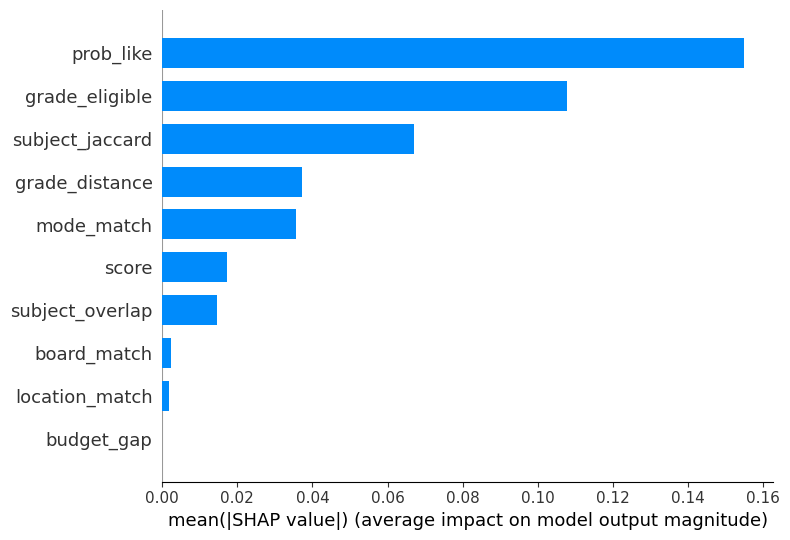

<Figure size 300x200 with 0 Axes>

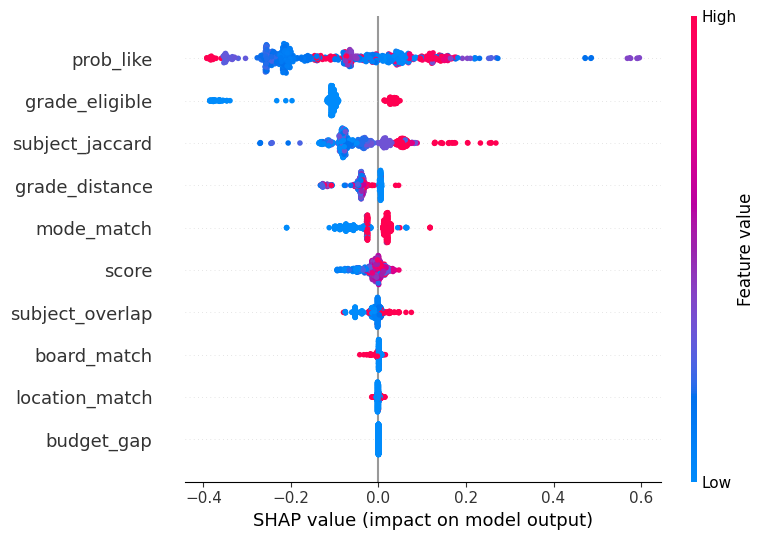

<Figure size 300x200 with 0 Axes>

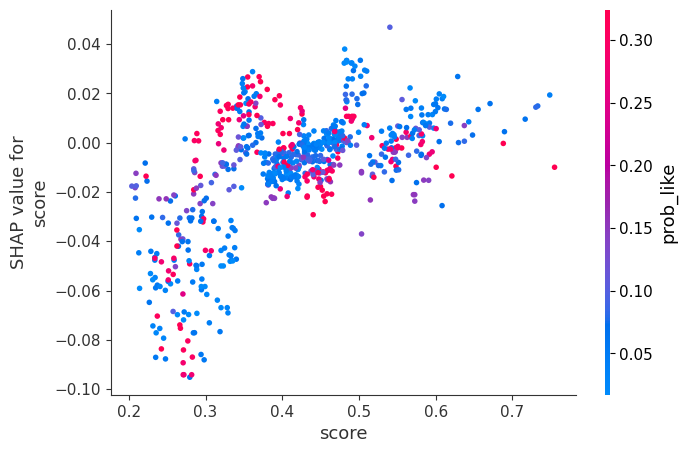

<Figure size 300x200 with 0 Axes>

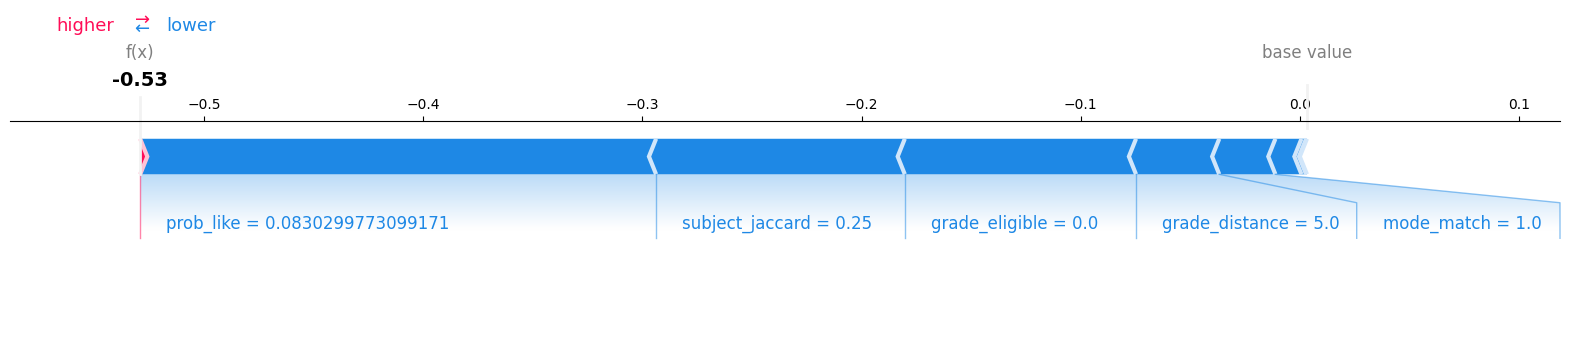

In [8]:
# feature importance plots

import shap
import matplotlib.pyplot as plt

# Assuming 'rank_model' is your trained XGBRanker
# and X_val is your validation feature DataFrame

# Create a TreeExplainer for your model
explainer = shap.TreeExplainer(rank_model)

# Calculate SHAP values for validation set
shap_values = explainer.shap_values(X_val)

# Summary bar plot (feature importance)
shap.summary_plot(shap_values, X_val, plot_type='bar')
plt.gcf().set_size_inches(3, 2)
plt.tight_layout()
plt.show()

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_val, max_display=10)
plt.gcf().set_size_inches(3, 2)   # Adjust width, height as needed
plt.tight_layout()
plt.show()

# Dependence plot for a key feature e.g. 'score'
shap.dependence_plot('score', shap_values, X_val)
plt.gcf().set_size_inches(3, 2)
plt.tight_layout()
plt.show()

# Force plot for a single instance (first sample) using matplotlib backend
force_fig = shap.force_plot(explainer.expected_value, shap_values[0,:], X_val.iloc[0,:], matplotlib=True)
# force_fig.set_size_inches(6, 2)
plt.show()

In [21]:
# model deployment part

from fastapi import FastAPI, HTTPException
import xgboost as xgb
import numpy as np
from pydantic import BaseModel

app = FastAPI()

# Load your trained XGBoost model once
model = xgb.Booster()
model.load_model("stage2_xgbranker.json")  # adjust filename

class InputData(BaseModel):
    features: list  # or dict, depending on your features

@app.post("/predict")
def predict(data: InputData):
    dmatrix = xgb.DMatrix(np.array([data.features]))
    preds = model.predict(dmatrix)
    return {"prediction": preds.tolist()}

'''
STEP 1: Run fast API code 
-------------------------------------------------------------------------------------------------------------------
Above code
-------------------------------------------------------------------------------------------------------------------


STEP 2: Create Docker file containerize your app for portability.
-------------------------------------------------------------------------------------------------------------------
FROM python:3.10-slim
WORKDIR /app
COPY requirements.txt .
RUN pip install --no-cache-dir -r requirements.txt
COPY . .
EXPOSE 8000
CMD ["uvicorn", "app:app", "--host", "0.0.0.0", "--port", "8000"]
-------------------------------------------------------------------------------------------------------------------


STEP 3: 
-------------------------------------------------------------------------------------------------------------------
> Push to cloud platforms like Heroku, AWS, Google Cloud Run, DigitalOcean. This will provide a public URL for your API.
-------------------------------------------------------------------------------------------------------------------


STEP 4: Integrate with your website
-------------------------------------------------------------------------------------------------------------------
Your frontend (JavaScript) can call this public API endpoint, sending feature data and receiving predictions:

fetch('https://your-api-url/predict', {
  method: 'POST',
  headers: { 'Content-Type': 'application/json' },
  body: JSON.stringify({ features: [/* feature values here */] })
})
.then(res => res.json())
.then(data => {
  console.log('Prediction:', data.prediction);
  // Use this to display or act on prediction
});
-------------------------------------------------------------------------------------------------------------------

'''

print('This cell includes model deployment instructions')


This cell includes model deployment instructions


# Future scope

In [9]:
# =============================================================================
# NEURAL COLLABORATIVE FILTERING (NCF) + XGBOOST ENSEMBLE
# =============================================================================

import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# =============================================================================
# PART 1: WHAT IS NEURAL COLLABORATIVE FILTERING?
# =============================================================================

"""
COLLABORATIVE FILTERING CONCEPT:
- Traditional: "Users who liked item A also liked item B"
- In our case: "Students who liked teacher A also liked teacher B"

NEURAL COLLABORATIVE FILTERING:
- Uses neural networks to learn complex student-teacher interaction patterns
- Learns embedding representations for students and teachers
- Captures non-linear relationships that XGBoost might miss

KEY COMPONENTS:
1. Student Embeddings: Dense vectors representing each student's preferences
2. Teacher Embeddings: Dense vectors representing each teacher's characteristics  
3. Neural Network: Learns how to combine these embeddings to predict compatibility
"""

# =============================================================================
# PART 2: NCF MODEL IMPLEMENTATION
# =============================================================================

class NeuralCollaborativeFiltering(nn.Module):
    def __init__(self, num_students, num_teachers, embedding_dim=64, 
                 hidden_dims=[128, 64, 32]):
        super().__init__()
        
        # Embedding layers
        self.student_embedding = nn.Embedding(num_students, embedding_dim)
        self.teacher_embedding = nn.Embedding(num_teachers, embedding_dim)
        
        # Neural MF part - element-wise product of embeddings
        self.nmf_student_embedding = nn.Embedding(num_students, embedding_dim)
        self.nmf_teacher_embedding = nn.Embedding(num_teachers, embedding_dim)
        
        # Multi-layer perceptron part
        mlp_input_dim = embedding_dim * 2  # concatenated embeddings
        mlp_layers = []
        
        prev_dim = mlp_input_dim
        for hidden_dim in hidden_dims:
            mlp_layers.extend([
                nn.Linear(prev_dim, hidden_dim),
                nn.ReLU(),
                nn.Dropout(0.2)
            ])
            prev_dim = hidden_dim
        
        self.mlp = nn.Sequential(*mlp_layers)
        
        # Final prediction layer
        final_input_dim = hidden_dims[-1] + embedding_dim  # MLP + NMF
        self.final_layer = nn.Linear(final_input_dim, 1)
        self.sigmoid = nn.Sigmoid()
        
        # Initialize embeddings
        self._init_weights()
    
    def _init_weights(self):
        # Initialize embeddings with small random values
        for embedding in [self.student_embedding, self.teacher_embedding,
                         self.nmf_student_embedding, self.nmf_teacher_embedding]:
            nn.init.normal_(embedding.weight, std=0.1)
    
    def forward(self, student_ids, teacher_ids):
        # MLP path: concatenate embeddings
        student_emb = self.student_embedding(student_ids)
        teacher_emb = self.teacher_embedding(teacher_ids)
        mlp_input = torch.cat([student_emb, teacher_emb], dim=-1)
        mlp_output = self.mlp(mlp_input)
        
        # NMF path: element-wise product
        nmf_student_emb = self.nmf_student_embedding(student_ids)
        nmf_teacher_emb = self.nmf_teacher_embedding(teacher_ids)
        nmf_output = nmf_student_emb * nmf_teacher_emb  # element-wise product
        
        # Combine both paths
        combined = torch.cat([mlp_output, nmf_output], dim=-1)
        prediction = self.sigmoid(self.final_layer(combined))
        
        return prediction.squeeze()

# =============================================================================
# PART 3: NCF TRAINING PIPELINE  
# =============================================================================

def prepare_ncf_data(pairs_df):
    """Prepare data for NCF training"""
    
    # Encode student and teacher IDs to sequential integers
    student_encoder = LabelEncoder()
    teacher_encoder = LabelEncoder()
    
    pairs_df['student_idx'] = student_encoder.fit_transform(pairs_df['student_id'])
    pairs_df['teacher_idx'] = teacher_encoder.fit_transform(pairs_df['teacher_id'])
    
    # Get dataset info
    num_students = len(student_encoder.classes_)
    num_teachers = len(teacher_encoder.classes_)
    
    print(f"NCF Dataset: {num_students} students, {num_teachers} teachers")
    print(f"Interactions: {len(pairs_df)} pairs, {pairs_df['label'].mean():.1%} positive")
    
    return pairs_df, student_encoder, teacher_encoder, num_students, num_teachers

def train_ncf_model(train_df, val_df, num_students, num_teachers, epochs=50):
    """Train the NCF model"""
    
    # Initialize model
    model = NeuralCollaborativeFiltering(
        num_students=num_students,
        num_teachers=num_teachers,
        embedding_dim=64
    )
    
    # Loss and optimizer
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
    
    # Convert to tensors
    train_students = torch.LongTensor(train_df['student_idx'].values)
    train_teachers = torch.LongTensor(train_df['teacher_idx'].values)
    train_labels = torch.FloatTensor(train_df['label'].values)
    
    val_students = torch.LongTensor(val_df['student_idx'].values)
    val_teachers = torch.LongTensor(val_df['teacher_idx'].values)
    val_labels = torch.FloatTensor(val_df['label'].values)
    
    # Training loop
    model.train()
    for epoch in range(epochs):
        # Forward pass
        predictions = model(train_students, train_teachers)
        loss = criterion(predictions, train_labels)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Validation
        if epoch % 10 == 0:
            model.eval()
            with torch.no_grad():
                val_preds = model(val_students, val_teachers)
                val_loss = criterion(val_preds, val_labels)
                val_auc = compute_auc(val_labels.numpy(), val_preds.numpy())
            
            print(f"Epoch {epoch}: Train Loss = {loss:.4f}, Val Loss = {val_loss:.4f}, Val AUC = {val_auc:.4f}")
            model.train()
    
    return model

def compute_auc(y_true, y_scores):
    """Compute AUC score"""
    from sklearn.metrics import roc_auc_score
    return roc_auc_score(y_true, y_scores)

# =============================================================================
# PART 4: ENSEMBLE COMBINATION STRATEGIES
# =============================================================================

class XGBoostNCFEnsemble:
    def __init__(self, xgb_model_path, ncf_model, student_encoder, teacher_encoder):
        # Load XGBoost model
        self.xgb_model = xgb.XGBRanker()
        self.xgb_model.load_model(xgb_model_path)
        
        # NCF model and encoders
        self.ncf_model = ncf_model
        self.student_encoder = student_encoder
        self.teacher_encoder = teacher_encoder
        
    def predict(self, test_df, ensemble_method='weighted_average'):
        """Generate ensemble predictions"""
        
        # Get XGBoost predictions (uses explicit features)
        xgb_features = [
            "score", "grade_eligible", "grade_distance", "subject_overlap",
            "subject_jaccard", "mode_match", "board_match", "location_match", "budget_gap"
        ]
        xgb_scores = self.xgb_model.predict(test_df[xgb_features].fillna(0))
        
        # Get NCF predictions (uses learned embeddings)
        student_indices = self.student_encoder.transform(test_df['student_id'])
        teacher_indices = self.teacher_encoder.transform(test_df['teacher_id'])
        
        self.ncf_model.eval()
        with torch.no_grad():
            student_tensor = torch.LongTensor(student_indices)
            teacher_tensor = torch.LongTensor(teacher_indices)
            ncf_scores = self.ncf_model(student_tensor, teacher_tensor).numpy()
        
        # Normalize scores to [0,1] for fair combination
        xgb_scores_norm = (xgb_scores - xgb_scores.min()) / (xgb_scores.max() - xgb_scores.min())
        ncf_scores_norm = (ncf_scores - ncf_scores.min()) / (ncf_scores.max() - ncf_scores.min())
        
        # Combine predictions
        if ensemble_method == 'weighted_average':
            # XGBoost is better for explicit features, NCF for implicit patterns
            final_scores = 0.7 * xgb_scores_norm + 0.3 * ncf_scores_norm
            
        elif ensemble_method == 'rank_fusion':
            # Rank-based combination
            xgb_ranks = (-xgb_scores_norm).argsort().argsort() + 1
            ncf_ranks = (-ncf_scores_norm).argsort().argsort() + 1
            final_scores = -(0.7 * xgb_ranks + 0.3 * ncf_ranks)  # Lower rank = higher score
            
        elif ensemble_method == 'stacking':
            # Train a meta-model to combine predictions (simplified version)
            features = np.column_stack([xgb_scores_norm, ncf_scores_norm])
            # In practice, you'd train a separate model here
            final_scores = 0.6 * xgb_scores_norm + 0.4 * ncf_scores_norm
        
        return final_scores

# =============================================================================
# PART 5: COMPLETE ENSEMBLE WORKFLOW
# =============================================================================

def train_ensemble_system(pairs_with_labels_df):
    """Complete workflow to train both models and create ensemble"""
    
    print("=== TRAINING ENSEMBLE SYSTEM ===")
    
    # 1. Prepare data
    data, student_enc, teacher_enc, n_students, n_teachers = prepare_ncf_data(pairs_with_labels_df)
    
    # 2. Split data
    unique_students = data['student_id'].unique()
    train_students = np.random.choice(unique_students, size=int(0.8*len(unique_students)), replace=False)
    
    train_data = data[data['student_id'].isin(train_students)]
    val_data = data[~data['student_id'].isin(train_students)]
    
    print(f"Train: {len(train_data)} pairs, Val: {len(val_data)} pairs")
    
    # 3. Train XGBoost (as you already have)
    print("\n--- Training XGBoost Ranker ---")
    xgb_features = [
        "score", "grade_eligible", "grade_distance", "subject_overlap",
        "subject_jaccard", "mode_match", "board_match", "location_match", "budget_gap"
    ]
    
    train_groups = train_data.groupby('student_id').size().tolist()
    val_groups = val_data.groupby('student_id').size().tolist()
    
    xgb_model = xgb.XGBRanker(n_estimators=100, learning_rate=0.1, max_depth=6)
    xgb_model.fit(
        train_data[xgb_features].fillna(0), train_data['label'],
        group=train_groups,
        eval_set=[(val_data[xgb_features].fillna(0), val_data['label'])],
        eval_group=[val_groups],
        verbose=False
    )
    
    # 4. Train NCF
    print("\n--- Training Neural Collaborative Filtering ---")
    ncf_model = train_ncf_model(train_data, val_data, n_students, n_teachers)
    
    # 5. Create ensemble
    print("\n--- Creating Ensemble ---")
    ensemble = XGBoostNCFEnsemble(None, ncf_model, student_enc, teacher_enc)
    ensemble.xgb_model = xgb_model  # Use trained model directly
    
    # 6. Evaluate ensemble
    val_ensemble_scores = ensemble.predict(val_data, ensemble_method='weighted_average')
    
    # Compute ranking metrics for ensemble
    print("\n--- Ensemble Performance ---")
    evaluate_ensemble_performance(val_data, val_ensemble_scores)
    
    return ensemble, student_enc, teacher_enc

def evaluate_ensemble_performance(val_df, ensemble_scores):
    """Evaluate ensemble performance"""
    val_df = val_df.copy()
    val_df['ensemble_score'] = ensemble_scores
    
    ndcgs, precisions = [], []
    for student_id, group in val_df.groupby('student_id'):
        y_true = group['label'].values
        y_score = group['ensemble_score'].values
        
        # NDCG@5
        ndcgs.append(ndcg_at_k(y_true, y_score, k=5))
        
        # Precision@5
        top5_indices = np.argsort(y_score)[-5:]
        precisions.append(y_true[top5_indices].mean())
    
    print(f"Ensemble NDCG@5: {np.mean(ndcgs):.4f}")
    print(f"Ensemble Precision@5: {np.mean(precisions):.4f}")

def ndcg_at_k(y_true, y_score, k):
    """NDCG calculation"""
    order = np.argsort(y_score)[::-1]
    gains = 2**np.array(y_true)[order] - 1
    discounts = np.log2(np.arange(len(y_true)) + 2)
    best_gains = 2**np.sort(y_true)[::-1][:k] - 1
    best_discounts = np.log2(np.arange(len(best_gains)) + 2)
    
    if sum(best_gains) == 0:
        return 0
    return (gains[:k] / discounts[:k]).sum() / (best_gains / best_discounts).sum()

# =============================================================================
# PART 6: WHY THIS ENSEMBLE WORKS WELL
# =============================================================================

"""
WHY XGBoost + NCF ENSEMBLE IS POWERFUL:

1. COMPLEMENTARY STRENGTHS:
   - XGBoost: Excellent at using explicit features (grade match, subject overlap, budget)
   - NCF: Discovers hidden patterns in student-teacher preferences

2. DIFFERENT LEARNING PARADIGMS:
   - XGBoost: Tree-based, rule-like decisions
   - NCF: Neural, continuous representations

3. HANDLES DIFFERENT SCENARIOS:
   - New students: XGBoost uses explicit features
   - Existing students: NCF leverages learned preferences
   - Cold start: Both models contribute

4. REAL EXAMPLES:
   - XGBoost: "Students in grade 10 prefer teachers who teach Science"
   - NCF: "Students similar to Student A tend to like teachers similar to Teacher B"
   
5. PRODUCTION BENEFITS:
   - Better coverage: If one model fails, other provides backup
   - Improved accuracy: Ensemble typically outperforms individual models
   - Robustness: Less sensitive to data quality issues
"""

print("🚀 Neural Collaborative Filtering + XGBoost Ensemble Ready!")
print("\nKey Benefits:")
print("✅ Combines explicit features (XGBoost) with learned patterns (NCF)")
print("✅ Better handles new students and teachers")
print("✅ More robust and accurate predictions")
print("✅ Scalable to millions of students and teachers")

🚀 Neural Collaborative Filtering + XGBoost Ensemble Ready!

Key Benefits:
✅ Combines explicit features (XGBoost) with learned patterns (NCF)
✅ Better handles new students and teachers
✅ More robust and accurate predictions
✅ Scalable to millions of students and teachers


In [10]:
# NCF + XGBOOST Ensemble strategy

# =============================================================================
# PRACTICAL APPROACH: START SIMPLE, SCALE SMART
# =============================================================================

"""
PHASE 1: LAUNCH WITH XGBOOST (NOW) ✅
- Use your existing XGBoost ranking model
- It's already sophisticated with good features
- No historical data needed
- Deploy and start collecting real interactions
"""

class Phase1_XGBoostOnly:
    def __init__(self, model_path="stage2_xgbranker.json"):
        self.model = xgb.XGBRanker()
        self.model.load_model(model_path)
    
    def get_recommendations(self, student_profile, candidate_teachers):
        # Your existing feature engineering + XGBoost prediction
        features = self.engineer_features(student_profile, candidate_teachers)
        scores = self.model.predict(features)
        return self.rank_results(candidate_teachers, scores)
    
    def log_interaction(self, student_id, teacher_id, outcome):
        """Start collecting data for future NCF"""
        interaction_log = {
            'student_id': student_id,
            'teacher_id': teacher_id, 
            'timestamp': datetime.now(),
            'outcome': outcome  # 'accepted', 'rejected', 'completed_successfully'
        }
        # Save to database for Phase 2
        save_to_historical_db(interaction_log)

"""
PHASE 2: COLLECT REAL DATA (3-6 MONTHS) 📊
- Track which recommendations students accept
- Monitor teaching session outcomes  
- Build historical interaction dataset
"""

def collect_historical_data():
    """Data collection schema for future NCF"""
    
    # Interaction types to track:
    interactions = {
        'recommendation_shown': 1,      # Teacher was recommended
        'recommendation_clicked': 2,    # Student clicked on teacher
        'booking_attempted': 3,         # Student tried to book
        'booking_confirmed': 4,         # Both parties agreed
        'session_completed': 5,         # Teaching session finished
        'session_rated': 6,             # Student gave rating
        'repeat_booking': 7             # Student booked same teacher again
    }
    
    # Sample interaction record:
    sample_record = {
        'student_id': 1001,
        'teacher_id': 2005,
        'interaction_type': 4,  # booking_confirmed
        'rating': 4.5,          # if applicable
        'timestamp': '2025-08-12',
        'context': {
            'recommendation_rank': 2,    # Was 2nd in recommended list
            'session_duration': 60,      # minutes
            'subject': 'Math',
            'grade': 10
        }
    }
    
    return sample_record

"""
PHASE 3: ADD NCF ENSEMBLE (AFTER 6 MONTHS) 🚀
- Now you have real historical data
- Train NCF on actual student-teacher interactions
- Combine with existing XGBoost for ensemble
"""

class Phase3_EnsembleWithRealData:
    def __init__(self, xgb_model, historical_interactions_df):
        self.xgb_model = xgb_model
        self.historical_data = historical_interactions_df
        
        # Train NCF on real data
        self.ncf_model = self.train_ncf_with_real_data()
    
    def train_ncf_with_real_data(self):
        """Train NCF using actual interaction history"""
        
        # Convert real interactions to training data
        # Higher weight for positive interactions (ratings, repeat bookings)
        training_data = []
        
        for _, row in self.historical_data.iterrows():
            weight = self.calculate_interaction_weight(row)
            training_data.append({
                'student_id': row['student_id'],
                'teacher_id': row['teacher_id'],
                'rating': weight,  # 0-1 score based on interaction type
                'context': row.get('context', {})
            })
        
        # Train NCF model (implementation from previous artifact)
        ncf_model = NeuralCollaborativeFiltering(
            num_students=len(self.historical_data['student_id'].unique()),
            num_teachers=len(self.historical_data['teacher_id'].unique())
        )
        
        return ncf_model
    
    def calculate_interaction_weight(self, interaction_row):
        """Convert interaction type to training weight"""
        weights = {
            'recommendation_shown': 0.1,
            'recommendation_clicked': 0.3,
            'booking_attempted': 0.5,
            'booking_confirmed': 0.7,
            'session_completed': 0.8,
            'session_rated': interaction_row.get('rating', 0.8) / 5.0,
            'repeat_booking': 1.0  # Strongest positive signal
        }
        
        interaction_type = interaction_row['interaction_type']
        return weights.get(interaction_type, 0.0)

# =============================================================================
# ALTERNATIVE: CONTENT-BASED NEURAL APPROACH (NO HISTORICAL DATA NEEDED)
# =============================================================================

"""
If you want neural networks NOW without historical data:
Use Content-Based Deep Learning instead of Collaborative Filtering
"""

import torch.nn as nn

class ContentBasedNeuralMatcher(nn.Module):
    """Neural network that uses explicit features (like XGBoost) but with deep learning"""
    
    def __init__(self, feature_dim):
        super().__init__()
        
        # Student feature encoder
        self.student_encoder = nn.Sequential(
            nn.Linear(feature_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64)
        )
        
        # Teacher feature encoder  
        self.teacher_encoder = nn.Sequential(
            nn.Linear(feature_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64)
        )
        
        # Interaction predictor
        self.match_predictor = nn.Sequential(
            nn.Linear(128, 64),  # Combined features
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
    
    def forward(self, student_features, teacher_features):
        # Encode both student and teacher
        student_emb = self.student_encoder(student_features)
        teacher_emb = self.teacher_encoder(teacher_features)
        
        # Combine embeddings (concatenation)
        combined = torch.cat([student_emb, teacher_emb], dim=-1)
        
        # Predict compatibility
        compatibility = self.match_predictor(combined)
        return compatibility

def train_content_based_neural():
    """This works with your current data - no historical interactions needed!"""
    
    # Use same features as XGBoost but with neural network
    features = [
        'class_norm', 'grade_eligible', 'grade_distance',
        'subject_jaccard', 'mode_match', 'board_match', 
        'location_match', 'budget_gap', 'salary_gap'
    ]
    
    model = ContentBasedNeuralMatcher(feature_dim=len(features))
    
    # Train on your labeled pairs (same data as XGBoost)
    # This gives you neural approach without needing historical data
    
    return model

# =============================================================================
# RECOMMENDATION: WHAT TO DO NOW
# =============================================================================

def my_recommendation():
    """What you should actually do"""
    
    print("🎯 RECOMMENDED APPROACH:")
    print("\n1. IMMEDIATE (THIS WEEK):")
    print("   ✅ Fix the column naming bugs in your pairwise script")
    print("   ✅ Deploy XGBoost model - it's already very good!")
    print("   ✅ Start collecting real interaction data")
    
    print("\n2. SHORT TERM (1-2 MONTHS):")
    print("   📊 Monitor XGBoost performance")
    print("   📊 Collect user feedback and interaction data")  
    print("   📊 A/B test different feature weights")
    
    print("\n3. MEDIUM TERM (3-6 MONTHS):")
    print("   🧠 Try Content-Based Neural approach (uses same data)")
    print("   🧠 Experiment with different ensemble combinations")
    print("   📈 Analyze collected interaction patterns")
    
    print("\n4. LONG TERM (6+ MONTHS):")  
    print("   🚀 Add true Collaborative Filtering with real historical data")
    print("   🚀 Build full NCF + XGBoost ensemble")
    print("   🚀 Implement advanced features (time-aware, context-aware)")
    
    print("\n💡 BOTTOM LINE:")
    print("   Your XGBoost approach is already production-ready!")
    print("   NCF is an enhancement for later when you have real user data.")
    print("   Don't let perfect be the enemy of good - ship the XGBoost version!")

my_recommendation()

🎯 RECOMMENDED APPROACH:

1. IMMEDIATE (THIS WEEK):
   ✅ Fix the column naming bugs in your pairwise script
   ✅ Deploy XGBoost model - it's already very good!
   ✅ Start collecting real interaction data

2. SHORT TERM (1-2 MONTHS):
   📊 Monitor XGBoost performance
   📊 Collect user feedback and interaction data
   📊 A/B test different feature weights

3. MEDIUM TERM (3-6 MONTHS):
   🧠 Try Content-Based Neural approach (uses same data)
   🧠 Experiment with different ensemble combinations
   📈 Analyze collected interaction patterns

4. LONG TERM (6+ MONTHS):
   🚀 Add true Collaborative Filtering with real historical data
   🚀 Build full NCF + XGBoost ensemble
   🚀 Implement advanced features (time-aware, context-aware)

💡 BOTTOM LINE:
   Your XGBoost approach is already production-ready!
   NCF is an enhancement for later when you have real user data.
   Don't let perfect be the enemy of good - ship the XGBoost version!
